In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn 
import matplotlib.pyplot as plt 

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
#create some data using lin reg formula 
weight = 0.7
bias = 0.3

#create the range values
start = 0
end = 1
step = 0.02

#create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]
len(X)


50

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     Predictions = None):
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'train_data')
    plt.scatter(test_data, test_labels, c = 'r', s = 4, label = 'test-data')

    if Predictions is not None:
        plt.scatter(test_data, Predictions, c = 'g' , s = 4, label = "preds")

    plt.legend(prop = {"size":14})

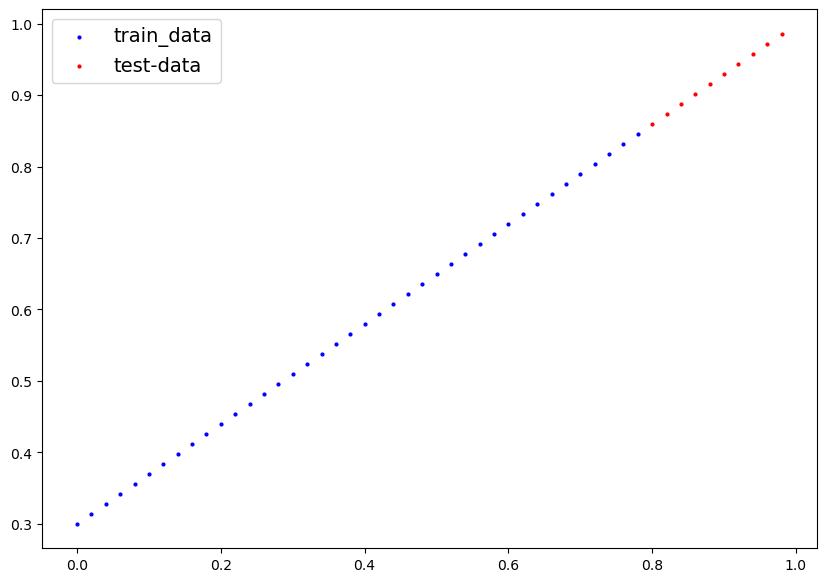

In [6]:
plot_predictions(X_train,y_train,X_test, y_test)

In [7]:
#build a linear model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #use nn.linear as we are making a linear reg modelfor model parameters
        self.linear_layer = nn.Linear(in_features=1, # linaer trans forma. probing layer, fully connected layer, dense layer
                                      out_features=1) #applied a linaer transformation therefore we dont ahve to set each paramters instead it is set for us 
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [8]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [9]:
#set the odel to use the target device
next(model_1.parameters()).device

device(type='cpu')

In [10]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [11]:
#for training we need a 
#loss function
#optimzer
#traiing loop
#testingloop 


In [12]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [13]:
#creating the training loop
torch.manual_seed(42)

epochs = 200

#device agnostic code for our data!
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epoch_count = []
train_loss_values= []
test_loss_values= []
for epoch in range(epochs):
    model_1.train()
    #forward pass
    y_pred = model_1(X_train)

    #calc the loss
    loss = loss_fn(y_pred, y_train)

    #optimizer zero grad
    optimizer.zero_grad()

    #perform backpropagation
    loss.backward()

    #optimzer step
    optimizer.step()

    ###TESTING
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)
    
    #print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test loss: {test_loss}")
        # print(model_1.state_dict())

Epoch: 0 | Train Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Train Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Train Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Train Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Train Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Train Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Train Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Train Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Train Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Train Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Train Loss: 0.0012645035749301314 | Test loss: 0.013801801018

In [15]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [16]:
weight, bias

(0.7, 0.3)

In [18]:
#makng evalutations
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

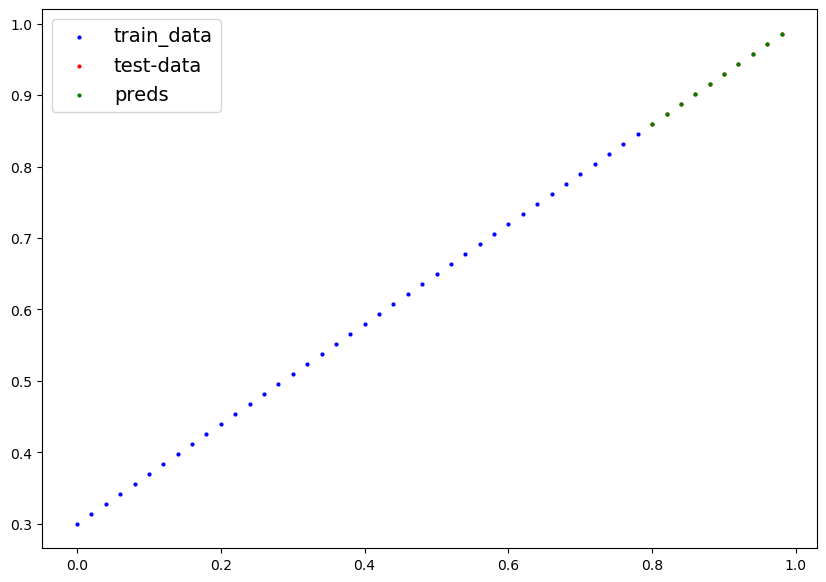

In [24]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), Predictions=y_preds.cpu())

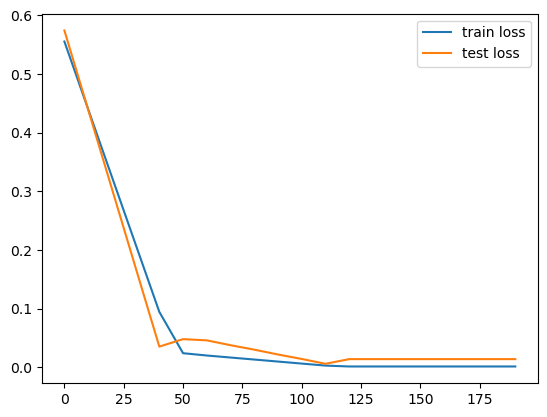

In [29]:
#plotting the train and test loss
import numpy as np 
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label = "train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "test loss")
plt.ylabel = "loss"
plt.xlabel = "epochs"
plt.legend()


In [32]:
#saving the mode
from pathlib import Path
#creates the dir
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#creat eh model save
MODEL_NAME = 'linear_reg_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to models/linear_reg_model_1.pth


In [30]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [33]:
#load the model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [34]:
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
#put the target model into the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [36]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [37]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [38]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')